# Introduction to SPARQL, RDF, and LOD

While many databases, services, or museums might expose their data via a web API, there can be limitations. Matthew Lincoln has an excellent tutorial at [The Programming Historian](https://programminghistorian.org/en/lessons/graph-databases-and-SPARQL) that walks us through some of these differences, but the key one is in the way the data is represented. When data is described using a 'Resource Description Framework', RDF, the resource - the 'thing'- is described via a series of relationships, rather than as rows in a table or keys having values. 

Information is in the relationships. It's a network. It's a _graph_. Thus, every 'thing' in this graph can have its own _uniform resource identifier_ (URI) that lives as a location on the internet. Information can then be created by making _statements_ that use these URIs, similarly to how English grammar creates meaning: subject verb object. Or, in RDF-speak, 'subject predicate object', also known as a _triple_. In this way, data in _different_ places can be linked together by referencing the elements they have in common. This is Linked Open Data (LOD). The access point for interrogating LOD is called an 'endpoint'. 

Finally, _SPARQL_ is an acronymn for SPARQL Protocol and RDF Query Language (yes, it's one of _those_ kinds of acronyms).

In this notebook, we're not using Python or R directly. Instead, we've set up a 'kernel' (think of that as the 'engine' for the notebook) that already includes everything necessary to set up and run SPARQL queries. (For reference, the kernel code is [here](https://github.com/paulovn/sparql-kernel)). Both R and Python can interact with and query endpoints, and manipulate linked open data, but for the sake of learning a bit of what one can do with SPARQL, this notebook keeps all of that ancillary code tucked away. The [followup notebook](Using R to Retrieve and Visualize Data from SPARQL.ipynb) to this one shows you how to use R to do some basic manipulations of the query results.

---

## Simple RDF example

Here, we are following [Matthew Lincoln's tutorial](https://programminghistorian.org/en/lessons/graph-databases-and-SPARQL).  

Let's look at his example, which concerns the painting, 'The Nightwatch'. 

`<The Nightwatch> <was created by> <Rembrandt van Rijn> .`

This _statement_ has three elements: 

+ the subject: `<The Nightwatch>`
+ the predicate: `<was created by>`
+ the object: `<Rembrandt van Rijn>`

Lincoln combines these, and other such statements, into a (pseudo-)RDF database like so:

```
<The Nightwatch> <was created by> <Rembrandt van Rijn> .
<The Nightwatch> <was created in> <1642> .
<The Nightwatch> <has medium> <oil on canvas> .
<Rembrandt van Rijn> <was born in> <1606> .
<Rembrandt van Rijn> <has nationality> <Dutch> .
<Johannes Vermeer> <has nationality> <Dutch> .
<Woman with a Balance> <was created by> <Johannes Vermeer> .
<Woman with a Balance> <has medium> <oil on canvas> .
```

Such RDF databases are describing nodes and links, and so we can visualize as a graph like so:

![A network visualization of the pseudo-RDF shown above. Arrows indicate the ‘direction’ of the predicate. For example, that ‘Woman with a Balance was created by Vermeer’, and not the other way around.](https://programminghistorian.org/images/graph-databases-and-SPARQL/sparql01.svg)

But there is a difference between the pseudo-RDF that Lincoln shows us, and what _actual_ RDF might look like:

```
<http://data.rijksmuseum.nl/item/8909812347> <http://purl.org/dc/terms/creator>  <http://dbpedia.org/resource/Rembrandt>
```

The human-readable version requires _more_ statements:

```
<http://data.rijksmuseum.nl/item/8909812347> <http://purl.org/dc/terms/title> "The Nightwatch" .

<http://purl.org/dc/terms/creator> <http://www.w3.org/1999/02/22-rdf-syntax-ns#label> "was created by" .

<http://dbpedia.org/resource/Rembrandt> <http://xmlns.com/foaf/0.1/name> "Rembrandt van Rijn" .
```

This is just a quick introduction; please do examine [Lincoln's tutorial](https://programminghistorian.org/en/lessons/graph-databases-and-SPARQL) for more details. But now, let's explore how this notebook can be used to write some queries.



In [2]:
# Jupyter notebooks have various built-in commands called 'magics' that are accessed with the '%' character; these depend on the kernel. 
# Let's see what the SPARQL kernel has
%lsmagics

Available magics:
%auth  %display  %endpoint  %format  %graph  %lang  %log  %lsmagics  %outfile  %prefix  %qparam  %show

%auth (basic|digest|none) <username> <passwd> : send HTTP authentication
%display raw | table [withtypes] | diagram [svg|png] [withliterals] : set display format
%endpoint <url> : set SPARQL endpoint. **REQUIRED**
%format JSON | N3 | XML | any | default : set requested result format
%graph <uri> : set default graph for the queries
%lang <lang> [...] | default | all : language(s) preferred for labels
%log critical | error | warning | info | debug : set logging level
%lsmagics  : list all magics
%outfile <filename> | NONE : save raw output to a file (use "%d" in name to add cell number, "NONE" to cancel saving)
%prefix <name> [<uri>] : set (or delete) a persistent URI prefix for all queries
%qparam <name> [<value>] : add (or delete) a persistent custom parameter to the endpoint query
%show <n> | all : maximum number of shown results

In [10]:
# when using this notebook, the first thing we have to do - or rather, the first time we run _any_ query,
# is to tell it what endpoint we're going to use. Let's use the British Museum's:

%endpoint http://collection.britishmuseum.org/sparql

Endpoint set to: http://collection.britishmuseum.org/sparql

Lincoln suggests that when we first encountered a new RDF graph, that we explore the network of relationships from an example object to understand what is going on in the database, to see what is available for querying. Since we're querying the British Museum, let's take [the Rosetta Stone](http://collection.britishmuseum.org/id/object/YCA62958) as our example.

In the query below, `p` and `o` stand for 'predicate' and 'object'. Thus, we're building up a query that asks, 'show me every statment structured `<The Rosetta Stone> <predicate> <object>`. When the results load up, you can right-click on each statement (which is a URI, remember) to see what we've discovered. This could give you the necessary information to construct more complicated queries.

*Nb* The British Museum sparql endpoint and the underlying infrastructure does not appear to be well supported. Results are sometimes flaky or not reachable.

In [11]:
SELECT ?p ?o
WHERE {
  <http://collection.britishmuseum.org/id/object/YCA62958> ?p ?o .
}


p,type,o,type
http://www.cidoc-crm.org/cidoc-crm/P138i_has_representation,uri,https://images.researchspace.org/collectionimages/AN00020/AN00020516_001_l.jpg,uri
http://www.cidoc-crm.org/cidoc-crm/P138i_has_representation,uri,https://images.researchspace.org/collectionimages/AN00773/AN00773236_001_l.jpg,uri
http://www.cidoc-crm.org/cidoc-crm/P138i_has_representation,uri,https://images.researchspace.org/collectionimages/AN00773/AN00773255_001_l.jpg,uri
http://www.cidoc-crm.org/cidoc-crm/P138i_has_representation,uri,https://images.researchspace.org/collectionimages/AN00871/AN00871967_001_l.jpg,uri
http://www.cidoc-crm.org/cidoc-crm/P138i_has_representation,uri,https://images.researchspace.org/collectionimages/AN00928/AN00928245_001_l.jpg,uri
http://www.researchspace.org/ontology/PX_has_main_representation,uri,https://images.researchspace.org/collectionimages/AN00016/AN00016456_004_l.jpg,uri
http://www.researchspace.org/ontology/Thing_created_on_Time,uri,http://collection.britishmuseum.org/id/object/YCA62958/production/1/date,uri
http://www.researchspace.org/ontology/Thing_has_material_type_Concept,uri,http://collection.britishmuseum.org/id/thesauri/x10901,uri
http://www.researchspace.org/ontology/Thing_has_material_type_Concept,uri,http://collection.britishmuseum.org/id/thesauri/x11794,uri
http://www.researchspace.org/ontology/Thing_has_material_type_Concept,uri,http://collection.britishmuseum.org/id/thesauri/x11014,uri


In this next query, we look for objects in the collection that have the label 'fibula'.

In [91]:
%endpoint http://collection.britishmuseum.org/sparql
%display table
PREFIX bmo: <http://www.researchspace.org/ontology/>
PREFIX skos: <http://www.w3.org/2004/02/skos/core#>

SELECT ?object
WHERE {

  # Search for all values of ?object that have a given "object type"
  ?object bmo:PX_object_type ?object_type .

  # That object type should have the label "fibula"
  ?object_type skos:prefLabel "fibula" .
}
LIMIT 10

Endpoint set to: http://collection.britishmuseum.org/sparql
Display: table

object
http://collection.britishmuseum.org/id/object/GAA14214
http://collection.britishmuseum.org/id/object/BCB9773
http://collection.britishmuseum.org/id/object/WCO94843
http://collection.britishmuseum.org/id/object/WCO94920
http://collection.britishmuseum.org/id/object/WCO94923
http://collection.britishmuseum.org/id/object/WCO95021
http://collection.britishmuseum.org/id/object/WCO95062
http://collection.britishmuseum.org/id/object/WCO95065
http://collection.britishmuseum.org/id/object/WCO96567
http://collection.britishmuseum.org/id/object/WCO152654


## Wikidata

Wikidata is another endpoint we can query. Below we have a query by Sebastian Heath that extracts some of the genealogical data on Roman emperors contained in that database. The `wd:Q842606` can be expanded to refer to [https://www.wikidata.org/wiki/Q842606](https://www.wikidata.org/wiki/Q842606), which describes the concept 'Roman Emperor'. `wdt:P39` is a predicate meaning 'Position held' [https://www.wikidata.org/wiki/Property:P39](https://www.wikidata.org/wiki/Property:P39). 

In [75]:
%endpoint http://query.wikidata.org/sparql
%display table

SELECT ?emperorLabel ?emperor_dob
       ?childLabel
       ?motherLabel ?maternalGrandfatherLabel ?maternalGrandmotherLabel
       ?emperor ?child ?mother ?maternalGrandfather ?maternalGrandmother WHERE {
  
  ?emperor wdt:P39 wd:Q842606 . #p39: position held. Q842606: Roman Emperor
  ?emperor wdt:P569 ?emperor_dob . # p569: date of birth
  ?child wdt:P22 ?emperor . #p22: father
  ?child wdt:P25 ?mother .  #p25: mother
  OPTIONAL { ?mother wdt:P22 ?maternalGrandfather }
  OPTIONAL { ?mother wdt:P25 ?maternalGrandmother }
  
 # automatic label expander
 SERVICE wikibase:label { bd:serviceParam wikibase:language "en". }
 
} ORDER BY ?emperor_dob


Endpoint set to: http://query.wikidata.org/sparql
Display: table

emperorLabel,emperor_dob,childLabel,motherLabel,maternalGrandfatherLabel,maternalGrandmotherLabel,emperor,child,mother,maternalGrandfather,maternalGrandmother
Augustus,-062-01-01T00:00:00Z,Julia the Elder,Scribonia,Lucius Scribonius Libo,,http://www.wikidata.org/entity/Q1405,http://www.wikidata.org/entity/Q2259,http://www.wikidata.org/entity/Q233444,http://www.wikidata.org/entity/Q1159617,
Tiberius,-041-11-14T00:00:00Z,Tiberius Julius Caesar,Julia the Elder,Augustus,Scribonia,http://www.wikidata.org/entity/Q1407,http://www.wikidata.org/entity/Q4222774,http://www.wikidata.org/entity/Q2259,http://www.wikidata.org/entity/Q1405,http://www.wikidata.org/entity/Q233444
Tiberius,-041-11-14T00:00:00Z,Drusus Julius Caesar,Vipsania Agrippina,Marcus Vipsanius Agrippa,Pomponia Caecilia Attica,http://www.wikidata.org/entity/Q1407,http://www.wikidata.org/entity/Q313737,http://www.wikidata.org/entity/Q232090,http://www.wikidata.org/entity/Q48174,http://www.wikidata.org/entity/Q152626
Claudius,-009-07-30T00:00:00Z,Claudia Octavia,Messalina,Marcus Valerius Messalla Barbatus,Domitia Lepida the Younger,http://www.wikidata.org/entity/Q1411,http://www.wikidata.org/entity/Q231262,http://www.wikidata.org/entity/Q229871,http://www.wikidata.org/entity/Q1246807,http://www.wikidata.org/entity/Q268964
Claudius,-009-07-30T00:00:00Z,Britannicus,Messalina,Marcus Valerius Messalla Barbatus,Domitia Lepida the Younger,http://www.wikidata.org/entity/Q1411,http://www.wikidata.org/entity/Q313115,http://www.wikidata.org/entity/Q229871,http://www.wikidata.org/entity/Q1246807,http://www.wikidata.org/entity/Q268964
Claudius,-009-07-30T00:00:00Z,Claudius Drusus,Plautia Urgulanilla,Marcus Plautius Silvanus,,http://www.wikidata.org/entity/Q1411,http://www.wikidata.org/entity/Q2975271,http://www.wikidata.org/entity/Q236259,http://www.wikidata.org/entity/Q1232026,
Claudius,-009-07-30T00:00:00Z,Claudia Antonia,Aelia Paetina,Sextus Aelius Catus,,http://www.wikidata.org/entity/Q1411,http://www.wikidata.org/entity/Q255410,http://www.wikidata.org/entity/Q238448,http://www.wikidata.org/entity/Q778051,
Vespasian,0009-11-15T00:00:00Z,Titus,Domitilla the Elder,Flavius Liberalis,,http://www.wikidata.org/entity/Q1419,http://www.wikidata.org/entity/Q1421,http://www.wikidata.org/entity/Q241102,http://www.wikidata.org/entity/Q1114524,
Vespasian,0009-11-15T00:00:00Z,Domitian,Domitilla the Elder,Flavius Liberalis,,http://www.wikidata.org/entity/Q1419,http://www.wikidata.org/entity/Q1423,http://www.wikidata.org/entity/Q241102,http://www.wikidata.org/entity/Q1114524,
Vespasian,0009-11-15T00:00:00Z,Domitilla the Younger,Domitilla the Elder,Flavius Liberalis,,http://www.wikidata.org/entity/Q1419,http://www.wikidata.org/entity/Q260156,http://www.wikidata.org/entity/Q241102,http://www.wikidata.org/entity/Q1114524,


Let's visualize these relationships. We're running the same query, but we use CONSTRUCT to create the nodes and edges that represent these familial relationships. We want to show 'emperor x is the father of person y' and 'person a is the mother of person y'.  That gives us the structure. To get the content, we run the SELECT command where we first tell it to retrieve those individuals who were emperor, and then retrieve the children data.  

Once you've run the query, use ctrl+f to find someone familiar, like Augustus (Q1405). In the resulting graph, an edge labeled 'p22' eg Q1405 ->P22 -> Q2259 can be read, 'Q1405 is the father of Q2259', or rather, 'Augustus is the father of Julia the Elder'.

Roman geneaology.... it's complicated! 

Endpoint set to: http://query.wikidata.org/sparql
Display: svg

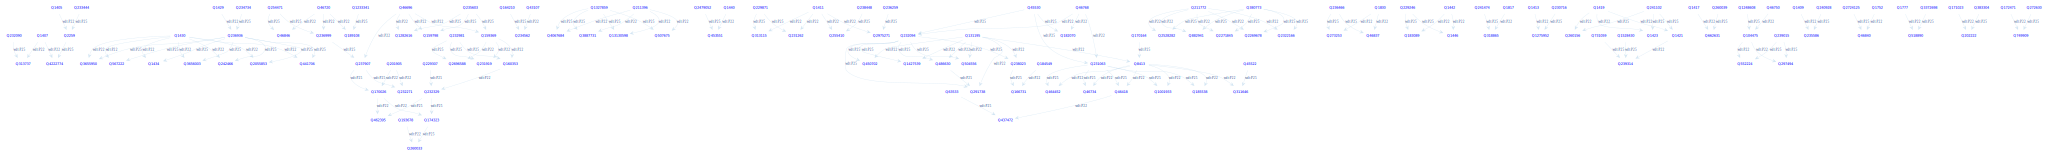

In [122]:
%endpoint http://query.wikidata.org/sparql
%display diagram 

CONSTRUCT {
         ?emperor wdt:P22 ?child . #p22: father
         ?mother wdt:P25 ?child .  #p25: mother 
          }

WHERE {
  
  ?emperor wdt:P39 wd:Q842606 .
  ?child wdt:P22 ?emperor . #p22: father
  ?child wdt:P25 ?mother .  #p25: mother
  OPTIONAL { ?mother wdt:P22 ?maternalGrandfather }
  OPTIONAL { ?mother wdt:P25 ?maternalGrandmother }
} 

## Nomisma

Another excellent SPARQL endpoint is the Nomisma portal for numismatic materials. 

http://nomisma.org/sparql

In [131]:
%endpoint http://nomisma.org/query

Endpoint set to: http://nomisma.org/query

Now, if you actually go to [http://query.wikidata.org/sparql](http://query.wikidata.org/sparql) you'll find a query builder with the following information already preloaded:

```
PREFIX rdf:	<http://www.w3.org/1999/02/22-rdf-syntax-ns#>
PREFIX bio:	<http://purl.org/vocab/bio/0.1/>
PREFIX crm:	<http://www.cidoc-crm.org/cidoc-crm/>
PREFIX dcmitype:	<http://purl.org/dc/dcmitype/>
PREFIX dcterms:	<http://purl.org/dc/terms/>
PREFIX foaf:	<http://xmlns.com/foaf/0.1/>
PREFIX geo:	<http://www.w3.org/2003/01/geo/wgs84_pos#>
PREFIX nm:	<http://nomisma.org/id/>
PREFIX nmo:	<http://nomisma.org/ontology#>
PREFIX org:	<http://www.w3.org/ns/org#>
PREFIX osgeo:	<http://data.ordnancesurvey.co.uk/ontology/geometry/>
PREFIX rdac:	<http://www.rdaregistry.info/Elements/c/>
PREFIX skos:	<http://www.w3.org/2004/02/skos/core#>
PREFIX spatial: <http://jena.apache.org/spatial#>
PREFIX void:	<http://rdfs.org/ns/void#>
PREFIX xsd:	<http://www.w3.org/2001/XMLSchema#>

SELECT * WHERE {
  ?s ?p ?o
} LIMIT 100
```

All those prefixes are the ontologies being used to describe the materials. The `?s ?p ?o` are the subject, predicate, objects that we're going to search for. Let's run some of the [example queries](http://nomisma.org/documentation/sparql) that Nomisma can handle. Since Roman Emperors are often depicted on coins, let's see which emperors are present in Nomisma.

In [132]:
%display table 
PREFIX rdf:	<http://www.w3.org/1999/02/22-rdf-syntax-ns#>
PREFIX bio:	<http://purl.org/vocab/bio/0.1/>
PREFIX crm:	<http://www.cidoc-crm.org/cidoc-crm/>
PREFIX dcmitype:	<http://purl.org/dc/dcmitype/>
PREFIX dcterms:	<http://purl.org/dc/terms/>
PREFIX foaf:	<http://xmlns.com/foaf/0.1/>
PREFIX geo:	<http://www.w3.org/2003/01/geo/wgs84_pos#>
PREFIX nm:	<http://nomisma.org/id/>
PREFIX nmo:	<http://nomisma.org/ontology#>
PREFIX org:	<http://www.w3.org/ns/org#>
PREFIX osgeo:	<http://data.ordnancesurvey.co.uk/ontology/geometry/>
PREFIX rdac:	<http://www.rdaregistry.info/Elements/c/>
PREFIX skos:	<http://www.w3.org/2004/02/skos/core#>
PREFIX spatial: <http://jena.apache.org/spatial#>
PREFIX void:	<http://rdfs.org/ns/void#>
PREFIX xsd:	<http://www.w3.org/2001/XMLSchema#>

SELECT ?uri ?label WHERE {
?uri a foaf:Person ;
  skos:prefLabel ?label ;         
  org:hasMembership ?membership .
?membership org:role nm:roman_emperor .
FILTER(langMatches(lang(?label), "EN"))
} 

Display: table

uri,label
http://nomisma.org/id/vabalathus,Vabalathus
http://nomisma.org/id/valerius_valens,Valerius Valens
http://nomisma.org/id/arcadius,Arcadius
http://nomisma.org/id/carausius,Carausius
http://nomisma.org/id/valerian,Valerian
http://nomisma.org/id/commodus,Commodus
http://nomisma.org/id/justinian_i,Justinian I
http://nomisma.org/id/tetricus_ii,Tetricus II
http://nomisma.org/id/nerva,Nerva
http://nomisma.org/id/olybrius,Olybrius


We can also do spatial queries; this one looks coins from mints within 50 km of Athens.

It also specifies the format in which we wants the results returned, and to write these results to a json file for further manipulation.

In [137]:
%format json  
%display table 
%outfile mints.json 
PREFIX rdf:	<http://www.w3.org/1999/02/22-rdf-syntax-ns#>
PREFIX dcterms:	<http://purl.org/dc/terms/>
PREFIX geo:	<http://www.w3.org/2003/01/geo/wgs84_pos#>
PREFIX nm:	<http://nomisma.org/id/>
PREFIX nmo:	<http://nomisma.org/ontology#>
PREFIX skos:	<http://www.w3.org/2004/02/skos/core#>
PREFIX spatial: <http://jena.apache.org/spatial#>
PREFIX xsd:	<http://www.w3.org/2001/XMLSchema#>

SELECT * WHERE {
   ?loc spatial:nearby (37.974722 23.7225 50 'km') ;
        geo:lat ?lat ;
        geo:long ?long .
   ?mint geo:location ?loc ;
         skos:prefLabel ?label ;
         a nmo:Mint
  FILTER langMatches (lang(?label), 'en')
}


Return format: JSON
Display: table
Output file: mints.json

loc,lat,long,mint,label
http://nomisma.org/id/rome#this,41.9,12.5,http://nomisma.org/id/rome,Rome
http://nomisma.org/id/caesareia_cappadocia#this,38.733333,35.483333,http://nomisma.org/id/caesareia_cappadocia,Caesarea in Cappadocia
http://nomisma.org/id/nicomedia#this,40.766667,29.916667,http://nomisma.org/id/nicomedia,Nicomedia
http://nomisma.org/id/siscia#this,45.483168,16.371388,http://nomisma.org/id/siscia,Siscia
http://nomisma.org/id/emisa#this,34.751899,36.724237,http://nomisma.org/id/emisa,Emisa
http://nomisma.org/id/viminacium#this,44.716471,21.166605,http://nomisma.org/id/viminacium,Viminacium
http://nomisma.org/id/panticapaeum#this,45.338611,36.468056,http://nomisma.org/id/panticapaeum,Panticapaeum
http://nomisma.org/id/phanagoria#this,45.189,36.825,http://nomisma.org/id/phanagoria,Phangoria
http://nomisma.org/id/thasos#this,40.777626,24.703702,http://nomisma.org/id/thasos,Thasos
http://nomisma.org/id/thessalian_league#this,39.641667,22.416667,http://nomisma.org/id/thessalian_league,Thessalian League
